In [1]:
pip install dextools-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
    "0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67",
    "0x3183ace137a96108292e58df284bbaaa6bca3b8a",
    "0x6d191737f9653a66d0e8236fff6e8ea543c05bc0",
    "0x8b1396f754b83afa1d06d273d5915d573b4f04ee",
    "0xf537776e58076ec7f50fe945c9384480816daa6d",
    "0x185737db359230898bf324d07de25160c71948b2",
    "0x1488bcfff8f7edd8286bf9549a76c8c7f10c829f",
    "0xfcbb6faac5f65ffe74e32ef4896b7ae5f5b35f0f",
    "0xa0b9faac81f34a849d57516a0193b37ec23e70b8",
    "0x1a5918dd41efcc34aba03c40b86242d10bc398fa",
    "0x1111e3ef0b6ae32e14a55e0e7cd9b8505177c2bf",
    "0xb16c60e0a93b73cd96bca5b0811715146b3f6fb4",
    "0x26a474cd0448b0d46487c811069b87a1f6d5dad6",
    "0xac411ce0f1a294544eee0922bfdfb64459301822",
    "0x89639b0c40b8517145d238df4a5a83247ebb66a5",
    "0x276bf434613bd8cb5c8b3282ec6445c9370e33fa",
    "0xd51ce9be4a1cb6185b76ba825c59236a6cf5ca2a",
    "0x3cfee83db8ddddc463c98d1224825a70de14a601",
    "0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497"

'0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497'

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# Wallet addresses
wallet_addresses = [
    "0x3cfee83db8ddddc463c98d1224825a70de14a601",
    "0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497"
]

# Etherscan API key
api_key = "5DSDMCYD46MENP7TZPUUDYBIDH1A2U6GB5"

# Define start and end block variables
start_block = 0  # Replace with the actual start block number
end_block = 999999999999  # Replace with the actual end block number

def get_token_transfers(wallet_address):
    url = f"https://api.etherscan.io/api"
    params = {
        "module": "account",
        "action": "tokentx",
        "address": wallet_address,
        "startblock": start_block,
        "endblock": end_block,
        "sort": "asc",
        "apikey": api_key,
    }
    response = requests.get(url, params=params)
    data = response.json()
    if data["status"] == "1":
        return data["result"]
    else:
        return []

# Pulling token transfer data for each wallet
all_token_transfers = []

for wallet in wallet_addresses:
    print(f"Pulling token transfers for wallet: {wallet}")
    token_transfers = get_token_transfers(wallet)
    all_token_transfers.extend(token_transfers)
    time.sleep(1)  # To avoid hitting rate limits

# Creating DataFrame from token transfers
df = pd.DataFrame(all_token_transfers)


Pulling token transfers for wallet: 0x3cfee83db8ddddc463c98d1224825a70de14a601
Pulling token transfers for wallet: 0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497


In [3]:
# Ensure we only keep necessary columns
df = df[["timeStamp", "hash", "from", "contractAddress", "to",  "tokenName", "tokenSymbol", "value"]]
df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')

# Define seven_days_ago variable
seven_days_ago = pd.Timestamp.now() - pd.Timedelta(days=30)

# Filtering token transactions within the past 30 days
df = df[df["timeStamp"] >= seven_days_ago]

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_2745/1138711918.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')


In [4]:
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value
759,2024-10-27 18:44:16,0x141b39a9edf87415772e897bed9e2452cd357a7e579e...,0x3cfee83db8ddddc463c98d1224825a70de14a601,0x1121acc14c63f3c872bfca497d10926a6098aac5,0x308c6fbd6a14881af333649f17f2fde9cd75e2a6,Department Of Government Efficiency,DOGE,70090288836475502275021
760,2024-10-27 19:50:24,0x5f025b685639c1286b978d8d75cf0ba50dc71191a955...,0x3cfee83db8ddddc463c98d1224825a70de14a601,0x1121acc14c63f3c872bfca497d10926a6098aac5,0x308c6fbd6a14881af333649f17f2fde9cd75e2a6,Department Of Government Efficiency,DOGE,119201839429768190575363
761,2024-10-27 19:50:24,0x5f025b685639c1286b978d8d75cf0ba50dc71191a955...,0x3cfee83db8ddddc463c98d1224825a70de14a601,0x1121acc14c63f3c872bfca497d10926a6098aac5,0xd493b1934826eeabb260f55d7f51fdefa4b0eed5,Department Of Government Efficiency,DOGE,13174953057990343175536
762,2024-10-27 21:00:48,0x85e586f67f8dbef53628894a718678c7c1a438b29cfe...,0xddc480e035edfd61c890410813dcd724c3486c97,0x79d7a360a77b20f9eda495652ef500dbc5a66588,0x3cfee83db8ddddc463c98d1224825a70de14a601,Fartcoin,FARTCOIN,865326685265325623
763,2024-10-27 21:00:48,0x3a8166a13099410cdf6b27f11f4c4004ce327371e140...,0x54f81645a2111eeffffac7e9b1b64f6d72c0fcf0,0x008c5fd107cf62a2982ee934c2f856ebbd340f6f,0x3cfee83db8ddddc463c98d1224825a70de14a601,PIKO INU,PIKO,456132562333232332
...,...,...,...,...,...,...,...,...
1386,2024-11-25 08:14:56,0x6d5de3a22a3df83f4618f5c5d8679313789c35ee8d28...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,99558500000000000000
1387,2024-11-25 20:56:32,0xd5b99d57f9fbf5dac52fe1aeec0df5e481f5577b5e62...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,77500000000000000000
1388,2024-11-26 00:25:36,0x826f59efef57f4f10941cbaa8d298945a826ff3cc37d...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,97868689898689898788
1389,2024-11-26 02:16:32,0xbed9f2f4a2082fe4452cb308b042d104c29305f817f9...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497,Peanuts Brother,Wally,74100000000000000000


In [21]:
YOURAPIKEY = 'uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW'
api_key = 'uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW'

In [25]:
import requests

url = "https://public-api.dextools.io/trial/v2/token/ether/0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783"
headers = {
    "accept": "application/json",
    "x-api-key": "uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW"
}

response = requests.get(url, headers=headers)
print(response.json())

{'statusCode': 200, 'data': {'address': '0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783', 'name': 'Peanuts Brother', 'symbol': 'Wally', 'logo': '', 'description': '', 'creationTime': '2024-11-24T10:20:59.000Z', 'creationBlock': 21256973, 'decimals': 8, 'socialInfo': {'email': '', 'bitbucket': '', 'discord': '', 'facebook': '', 'github': '', 'instagram': '', 'linkedin': '', 'medium': '', 'reddit': '', 'slack': '', 'telegram': '', 'tiktok': '', 'twitter': '', 'website': '', 'youtube': ''}}}


In [31]:
import requests

url = "https://public-api.dextools.io/trial/v2/token/ether/0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783/price"
headers = {
    "accept": "application/json",
    "x-api-key": "uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW"
}

response = requests.get(url, headers=headers)
print(response.json())


{'statusCode': 200, 'data': {'price': 0.00011759632703370067, 'priceChain': 3.5072463621205715e-08, 'variation5m': None, 'variationChain5m': None, 'variation1h': None, 'variationChain1h': None, 'variation6h': None, 'variationChain6h': None, 'price24h': 8.439131983841317e-05, 'priceChain24h': 2.4347391506009395e-08, 'variation24h': 39.3464721950862, 'variationChain24h': 44.05018957595179}}


In [32]:
# Get timestamp from row 1386
timestamp = df.loc[1386, 'timeStamp']

# Format the URL for historical price data
token_address = "0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783"
url = f"https://public-api.dextools.io/trial/v2/token/ether/{token_address}/price/{int(timestamp.timestamp())}"

headers = {
    "accept": "application/json",
    "x-api-key": "uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW"
}

# Make the request
response = requests.get(url, headers=headers)
print(f"Price data for timestamp {timestamp}:")
print(response.json())

Price data for timestamp 2024-11-25 08:14:56:
{'message': 'Missing Authentication Token'}


{
  "type": "apiKey",
  "in": "header",
  "name": "X-API-KEY"
}

In [133]:
Discovery = df.loc[[361]]
Discovery



,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,value_in_usd
361,2024-11-25 05:52:00,0xd93b7630feed002a1fc7828ad564123d57daeb8ac901...,0x814217be3b2ab91e47a011eee6e14c3b3fe65dad,0x37843bc944edbb0477df943d9061d359004a4e70,0xf537776e58076ec7f50fe945c9384480816daa6d,AEROBUD,AEROBUD,78645000000000000000,0.0


In [137]:
full_hash_9488 = df.loc[347, "hash"]
print(f"Full hash for index 9488: {full_hash_9488}")


Full hash for index 9488: 0x9524b0a27beefd1664a42ec57016b7ed3ab8061cc607564290af51b811b8f9d5


In [144]:
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,token_price_usd,value_in_usd
1033,2024-11-18 20:20:16,0xd9daa2ceecef976a13748af360ea21e13e11f0dae9f7...,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x1121acc14c63f3c872bfca497d10926a6098aac5,0x3cfee83db8ddddc463c98d1224825a70de14a601,Department Of Government Efficiency,DOGE,3418771776127555721571,None,0.0
1034,2024-11-18 22:19:44,0x9eefe097f93c98ab4ebbab9d5d863ffe9ee8333d59de...,0xd791df70d1f712cb4d50b2120ed2db83f34ef7f9,0x04b4af1ae6841713a4b1d37e4b3c2246cd33f2ad,0x3cfee83db8ddddc463c98d1224825a70de14a601,Helios DAO,HELIOS,2000000000000000000,None,0.0
1035,2024-11-18 22:21:52,0x070d1a4bae66d0f0f838c7a2e4c82b2f16b7d9b1616d...,0xd791df70d1f712cb4d50b2120ed2db83f34ef7f9,0x04b4af1ae6841713a4b1d37e4b3c2246cd33f2ad,0x3cfee83db8ddddc463c98d1224825a70de14a601,Helios DAO,HELIOS,4750000000000000000,None,0.0
1036,2024-11-19 02:27:12,0x70f5b43761811bdd37ccec86e029a5a5c167cbf7eeb5...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0x3cfee83db8ddddc463c98d1224825a70de14a601,Satoshiwifhat,SIF,8800000000000000000,None,0.0
1037,2024-11-19 07:19:28,0xa47b36ab5ea89a7262effb6e74db425cac61c35671a7...,0xd791df70d1f712cb4d50b2120ed2db83f34ef7f9,0x04b4af1ae6841713a4b1d37e4b3c2246cd33f2ad,0x3cfee83db8ddddc463c98d1224825a70de14a601,Helios DAO,HELIOS,99550000000000000000,None,0.0
1038,2024-11-19 22:58:08,0x316cb037566a0574ea8d9f523ed382734c5b3aadc9fd...,0xb983b0759c715b807ca4d33a871d4e26b8384f6a,0x2c3f695c96504249cf99b11b8b19fd397cd1e3e7,0x3cfee83db8ddddc463c98d1224825a70de14a601,Tengu Inu,TENGU,250000000000000000000,None,0.0
1039,2024-11-19 23:00:16,0x454f089007117427837cbd6334eb1dbb2a230dc8c474...,0xb983b0759c715b807ca4d33a871d4e26b8384f6a,0x2c3f695c96504249cf99b11b8b19fd397cd1e3e7,0x3cfee83db8ddddc463c98d1224825a70de14a601,Tengu Inu,TENGU,250000000000000000000,None,0.0
1040,2024-11-21 00:27:44,0x9524b0a27beefd1664a42ec57016b7ed3ab8061cc607...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0x3cfee83db8ddddc463c98d1224825a70de14a601,GIGA PNUT,GNUT,99669900000000000000,None,0.0
1041,2024-11-21 01:12:32,0xc83cbcc09eceea180bf87fbc4e41bfbed3ee54350c04...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0x3cfee83db8ddddc463c98d1224825a70de14a601,GIGA PNUT,GNUT,88553300000000000000,None,0.0
1042,2024-11-21 14:43:12,0xc013c000160ab8b59d57a793a6e1efde987f6018b62f...,0x3cfee83db8ddddc463c98d1224825a70de14a601,0x1121acc14c63f3c872bfca497d10926a6098aac5,0x60b0dad2d7d65b7d6efc0b746687020ccef0a233,Department Of Government Efficiency,DOGE,6745035596310751120505,None,0.0


In [127]:
df = df[df["value"].astype(float) > 0]
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,value_in_usd
340,2024-11-19 02:27:12,0x70f5b43761811bdd37ccec86e029a5a5c167cbf7eeb5...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,8800000000000000000,2.824293e+22
341,2024-11-19 07:17:20,0x509465faea33caf0e7cb434e700d5998c0f4671e42fc...,0xd791df70d1f712cb4d50b2120ed2db83f34ef7f9,0x04b4af1ae6841713a4b1d37e4b3c2246cd33f2ad,0xf537776e58076ec7f50fe945c9384480816daa6d,Helios DAO,HELIOS,99550000000000000000,3.194981e+23
342,2024-11-19 09:46:40,0x120981dd6519f85bc465f5354ae8261ebed2c14d0f79...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,999995889650000000000,0.000000e+00
343,2024-11-19 20:22:24,0x8e23b0c5c77639a8da1526f4d545ba96a108041973ca...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,6868000000000000000,0.000000e+00
344,2024-11-20 03:44:00,0xa91fc2dd349bccf1c5402f109113bec516ae2e37f630...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,9696500000000000000000,0.000000e+00
345,2024-11-20 10:05:52,0x3d088a53575efe5029458e022097f36c45d8ad73d80c...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,55566650000000000000,0.000000e+00
346,2024-11-20 13:34:56,0x133d22141af8623f635c22c96f6b99d1168620715f20...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,36565680000000000000,0.000000e+00
347,2024-11-21 00:27:44,0x9524b0a27beefd1664a42ec57016b7ed3ab8061cc607...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0xf537776e58076ec7f50fe945c9384480816daa6d,GIGA PNUT,GNUT,99669900000000000000,0.000000e+00
348,2024-11-21 01:12:32,0xc83cbcc09eceea180bf87fbc4e41bfbed3ee54350c04...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0xf537776e58076ec7f50fe945c9384480816daa6d,GIGA PNUT,GNUT,88553300000000000000,0.000000e+00
349,2024-11-21 05:34:56,0x460719467ec76f90c2c4ce5b9c3ae79c0299d185633e...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0xf537776e58076ec7f50fe945c9384480816daa6d,GIGA PNUT,GNUT,2300000000000000000,0.000000e+00


In [115]:
df 

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value
340,2024-11-19 02:27:12,0x70f5b43761811bdd37ccec86e029a5a5c167cbf7eeb5...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,8800000000000000000
341,2024-11-19 07:17:20,0x509465faea33caf0e7cb434e700d5998c0f4671e42fc...,0xd791df70d1f712cb4d50b2120ed2db83f34ef7f9,0x04b4af1ae6841713a4b1d37e4b3c2246cd33f2ad,0xf537776e58076ec7f50fe945c9384480816daa6d,Helios DAO,HELIOS,99550000000000000000
342,2024-11-19 09:46:40,0x120981dd6519f85bc465f5354ae8261ebed2c14d0f79...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,999995889650000000000
343,2024-11-19 20:22:24,0x8e23b0c5c77639a8da1526f4d545ba96a108041973ca...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,6868000000000000000
344,2024-11-20 03:44:00,0xa91fc2dd349bccf1c5402f109113bec516ae2e37f630...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,9696500000000000000000
345,2024-11-20 10:05:52,0x3d088a53575efe5029458e022097f36c45d8ad73d80c...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,55566650000000000000
346,2024-11-20 13:34:56,0x133d22141af8623f635c22c96f6b99d1168620715f20...,0xdd4a6592b26ff63a32f90b9e28e8d9e6bb36d3c3,0x55d0c027569318f819e81718e484862e6556766a,0xf537776e58076ec7f50fe945c9384480816daa6d,Satoshiwifhat,SIF,36565680000000000000
347,2024-11-21 00:27:44,0x9524b0a27beefd1664a42ec57016b7ed3ab8061cc607...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0xf537776e58076ec7f50fe945c9384480816daa6d,GIGA PNUT,GNUT,99669900000000000000
348,2024-11-21 01:12:32,0xc83cbcc09eceea180bf87fbc4e41bfbed3ee54350c04...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0xf537776e58076ec7f50fe945c9384480816daa6d,GIGA PNUT,GNUT,88553300000000000000
349,2024-11-21 05:34:56,0x460719467ec76f90c2c4ce5b9c3ae79c0299d185633e...,0xbaa57e831a7819c1127b4814375f58d0f32aa76a,0x619ef615fc1ef0c9e066b233ddbf50e5a9ad3de4,0xf537776e58076ec7f50fe945c9384480816daa6d,GIGA PNUT,GNUT,2300000000000000000


In [50]:
df

,blockNumber,timeStamp,hash,from,to,value,ethAmount
10025,21216020,2024-11-18 17:12:32,0x6cde0fa1534338df7a5b5ed4e6ee39a977977a297a25...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x0000000000001ff3684f28c67538d4d072c22734,1580692786034500100,1.580693
10026,21216067,2024-11-18 17:23:12,0x6d7689dc9b39561da0736b0ad5470fceddb295417a46...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,9458769224949000000,9.458769
10027,21216073,2024-11-18 17:23:12,0x52e2a5a45304afca4db3866dac1053eda09af10a3841...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,1567904370376642000,1.567904
10028,21216076,2024-11-18 17:23:12,0x03017b2f79c76e17445d679005c84378ac5c54c1c61e...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,1567904370376642000,1.567904
10029,21216087,2024-11-18 17:25:20,0x03ff77ff1a8eb771607cb6e8fab3c1377837432f29f7...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,1580692786034500100,1.580693
10030,21216088,2024-11-18 17:27:28,0x14346544e5fe176f73731926b904c65375c33f7cb35c...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,1567904370376642000,1.567904
10031,21216089,2024-11-18 17:27:28,0x415ef92b3a8a86cbc7c3a248f4025ec66c73ed61e45f...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,940742622225985100,0.940743
10032,21216141,2024-11-18 17:38:08,0x36e10e9e56d247e4e7267b58a815d860f93b354de409...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,157363593303234930,0.157364
10033,21216146,2024-11-18 17:38:08,0x2f9ebbdc7fd952a1280e37d677ec88350a636b795d8b...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x1111111254eeb25477b68fb85ed929f73a960582,157363593303234930,0.157364
10034,21216170,2024-11-18 17:42:24,0x4f929b57cd4b31d495bd8100990f0ccbfb382c4e59fa...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x0000000000001ff3684f28c67538d4d072c22734,157419578272950000,0.157420


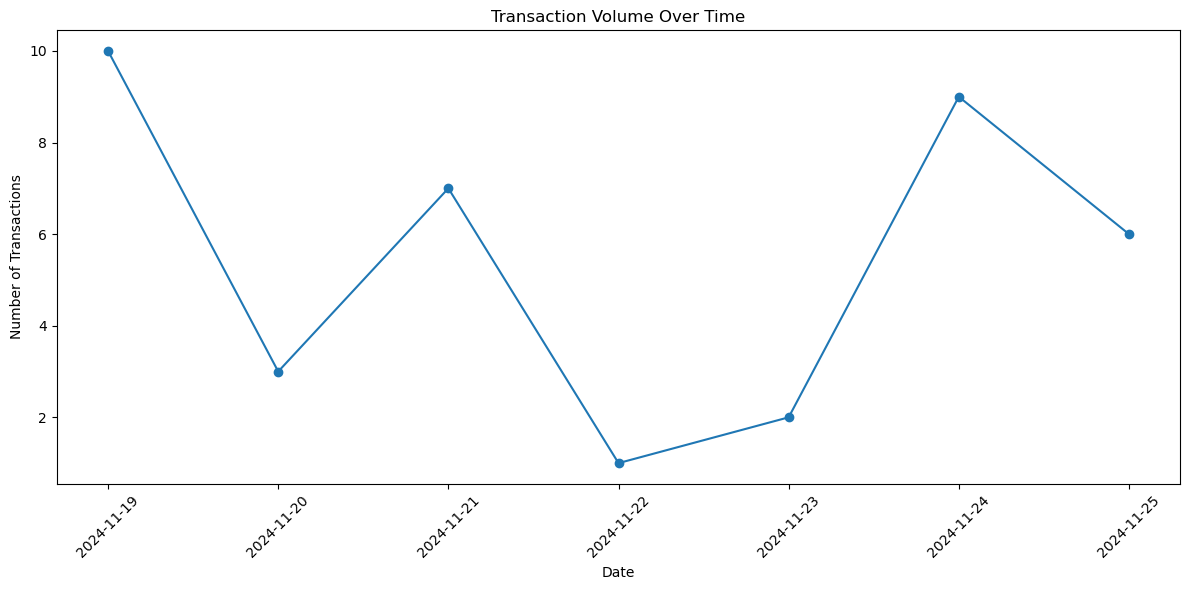

In [116]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Visualizing transaction volume over time if timeStamp exists
if "timeStamp" in df.columns:
    df['date'] = df['timeStamp'].dt.date
    transaction_volume = df.groupby('date').size()
    plt.plot(transaction_volume.index, transaction_volume.values, marker='o')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.title('Transaction Volume Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [51]:
token_df

,timeStamp,hash,from,to,tokenName,tokenSymbol,value
4871,2024-11-16 16:44:48,0x9012c061a49c5e2189c11ac4ca0f308321f6128be9ac...,0xf89d7b9c864f589bbf53a82105107622b35eaa40,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,USDC,USDC,21000000000
4872,2024-11-16 16:59:44,0x6d2f66c7a75d47f9345b08593b706889ec5fc9b570ec...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0x397ff1542f962076d0bfe58ea045ffa2d347aca0,USDC,USDC,1088702340
4873,2024-11-16 17:33:52,0x61fbea874a62638660a3e7e398b8fd5679b2365ffb6b...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,USDC,USDC,1200000000
4874,2024-11-16 17:40:16,0xd49ebda38a5b827fc51a19b5c24bcab88afaf813793e...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,USDC,USDC,1137740475
4875,2024-11-16 18:25:04,0x349487ef95203760249deb58497b363b78795389fc88...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0x397ff1542f962076d0bfe58ea045ffa2d347aca0,USDC,USDC,349731856
...,...,...,...,...,...,...,...
9307,2024-11-23 16:32:00,0x550be87af9e594e861c0fdcde35f9f7609cda8ee3578...,0x1111111254eeb25477b68fb85ed929f73a960582,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Department Of Government Efficiency,DOGE,10148424881363013536919
9308,2024-11-23 16:36:16,0x3aa133f2f64a31fed50176f288e35fcf547d45a792a7...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,VANRY,VANRY,20974500740934098000000
9309,2024-11-23 16:36:16,0x3aa133f2f64a31fed50176f288e35fcf547d45a792a7...,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Department Of Government Efficiency,DOGE,10194170156027544564041
9310,2024-11-23 18:12:16,0xfe6dea4f258ab665cb0de4abc10b718eb44b06b3cc41...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,VANRY,VANRY,20767578752119935000000


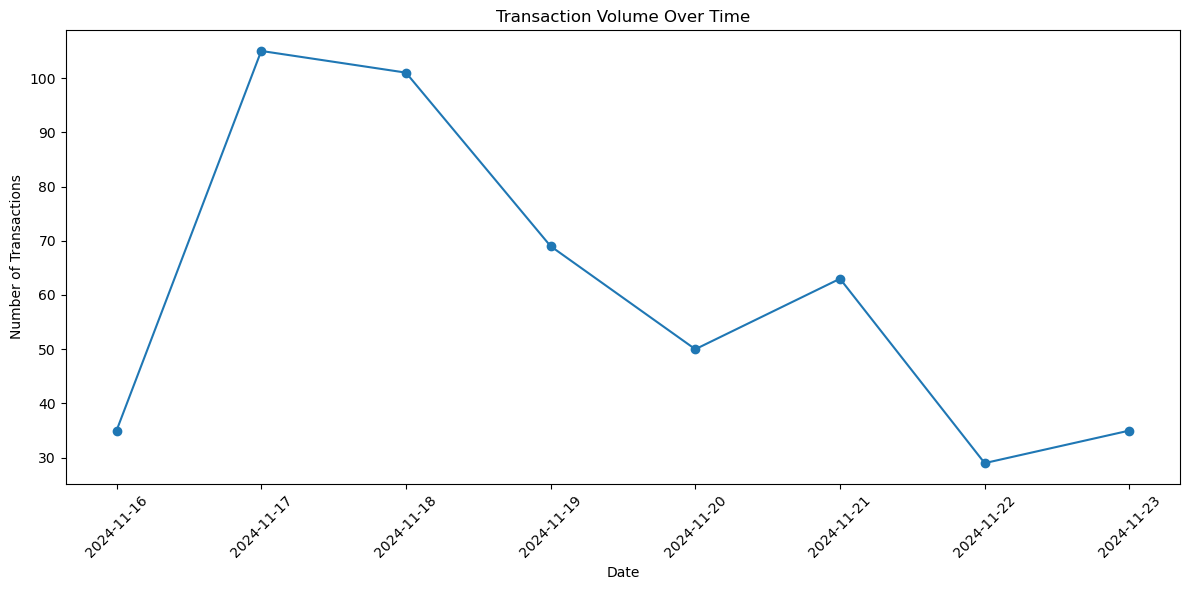

In [18]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Visualizing transaction volume over time
df['date'] = df['timeStamp'].dt.date
transaction_volume = df.groupby('date').size()
plt.plot(transaction_volume.index, transaction_volume.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pulling token transfers for wallet: 0xf537776e58076ec7f50fe945c9384480816daa6d
Pulling token transfers for wallet: 0x185737db359230898bf324d07de25160c71948b2
Pulling token transfers for wallet: 0x1488bcfff8f7edd8286bf9549a76c8c7f10c829f
Pulling token transfers for wallet: 0xfcbb6faac5f65ffe74e32ef4896b7ae5f5b35f0f


/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_37226/1872160184.py:36: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  token_df["timeStamp"] = pd.to_datetime(token_df["timeStamp"], unit='s')


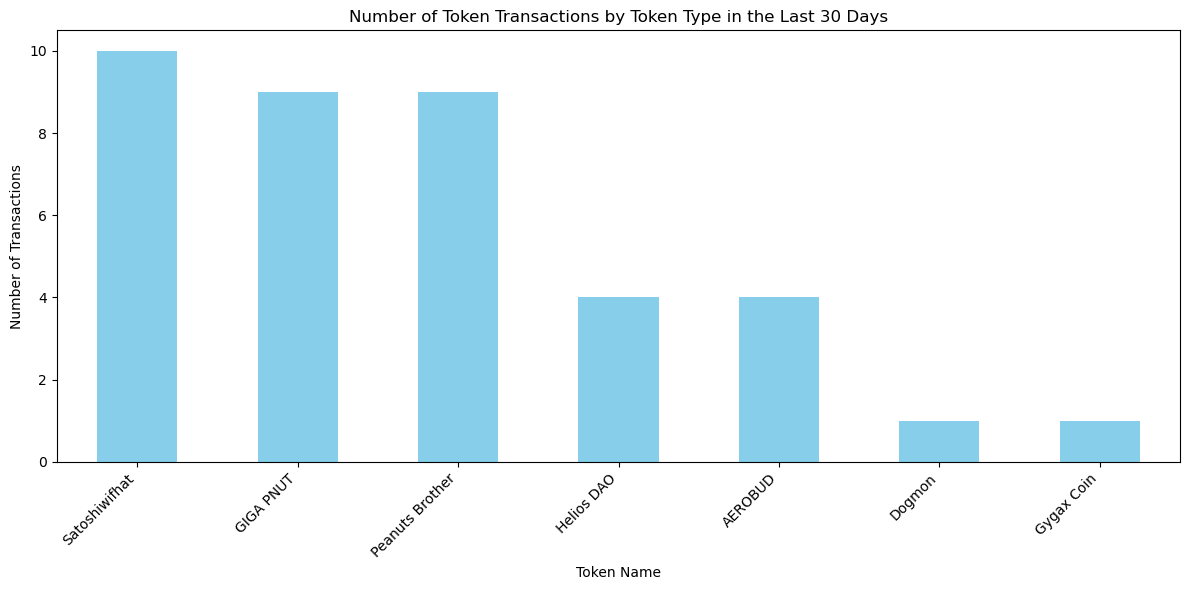

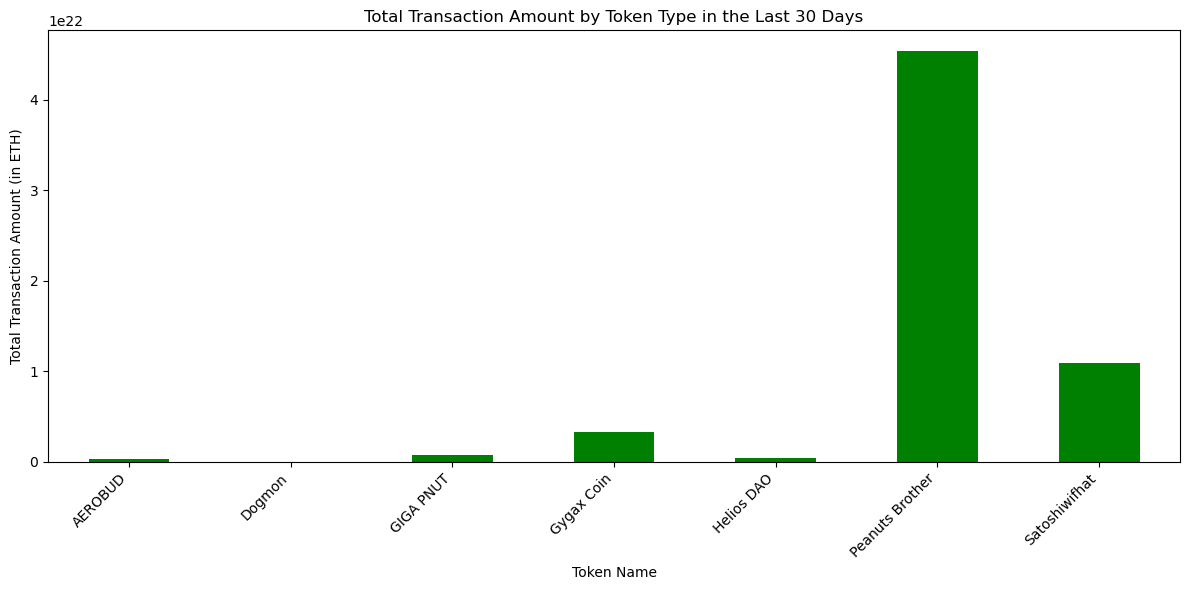

Completed token analysis and visualizations.


In [117]:
# New Cell: Analysis of Token Types and Transaction Amounts

# Function to get token information for transactions
def get_token_transfers(wallet_address):
    url = f"https://api.etherscan.io/api"
    params = {
        "module": "account",
        "action": "tokentx",
        "address": wallet_address,
        "startblock": start_block,
        "endblock": end_block,
        "sort": "asc",
        "apikey": api_key,
    }
    response = requests.get(url, params=params)
    data = response.json()
    if data["status"] == "1":
        return data["result"]
    else:
        return []

# Pulling token transfer data for each wallet
all_token_transfers = []

for wallet in wallet_addresses:
    print(f"Pulling token transfers for wallet: {wallet}")
    token_transfers = get_token_transfers(wallet)
    all_token_transfers.extend(token_transfers)
    time.sleep(1)  # To avoid hitting rate limits

# Creating DataFrame from token transfers
token_df = pd.DataFrame(all_token_transfers)

# Ensure we only keep necessary columns
token_df = token_df[["timeStamp", "hash", "from", "to", "tokenName", "tokenSymbol", "value"]]
token_df["timeStamp"] = pd.to_datetime(token_df["timeStamp"], unit='s')

# Filtering token transactions within the past 30 days
token_df = token_df[token_df["timeStamp"] >= seven_days_ago]

# Data Visualization: Token Transfers
plt.figure(figsize=(12, 6))

# Visualizing the number of token transactions by token type
token_counts = token_df["tokenName"].value_counts()
token_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Token Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Token Transactions by Token Type in the Last 30 Days')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability
plt.tight_layout()
plt.show()

# Data Visualization: Transaction Amounts
plt.figure(figsize=(12, 6))

# Aggregating transaction values by token type
token_value_agg = token_df.groupby("tokenName")["value"].apply(lambda x: x.astype(float).sum())
token_value_agg.plot(kind='bar', color='green')
plt.xlabel('Token Name')
plt.ylabel('Total Transaction Amount (in ETH)')
plt.title('Total Transaction Amount by Token Type in the Last 30 Days')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability
plt.tight_layout()
plt.show()

print("Completed token analysis and visualizations.")


In [53]:
token_df

,timeStamp,hash,from,to,tokenName,tokenSymbol,value
5014,2024-11-18 14:17:36,0x143b1d00b12b4df4c6b21f63fc3b4168d21017ae7391...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,USDC,USDC,422931509
5015,2024-11-18 14:34:40,0xe5a3f151fdf6cd6362a1a6f7b8cf879bb03f55d5220e...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,USDC,USDC,500000000
5016,2024-11-18 14:43:12,0x7ca89a9edea3bfb26f50db98e5cc4dbcfaf738d531bb...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,USDC,USDC,939374215
5017,2024-11-18 14:58:08,0x8237073a44faefe9b6e2a38563d6e0e1760a6f40d6ab...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,USDC,USDC,665320813
5018,2024-11-18 15:02:24,0x8cfe411271643b67b4dbf50908d7416b8c6a9fcb9a33...,0x6d191737f9653a66d0e8236fff6e8ea543c05bc0,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,USDC,USDC,500292615
...,...,...,...,...,...,...,...
9488,2024-11-25 17:31:44,0x328dd557d07bdbf7bddb4460e04b438d1cb0c1431662...,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Department Of Government Efficiency,DOGE,33513812683700888853007
9489,2024-11-25 18:16:32,0x250394283f7465f2e52d9c6a7e15ea207d66c90159af...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,Neiro,Neiro,4310800595098573
9490,2024-11-25 18:16:32,0x250394283f7465f2e52d9c6a7e15ea207d66c90159af...,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Department Of Government Efficiency,DOGE,32649168251771860403841
9491,2024-11-25 18:18:40,0xc4a73a3df3943a47209b02854ce6e89372511b9e50b0...,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,Neiro,Neiro,4310800595098573
